48
48
340


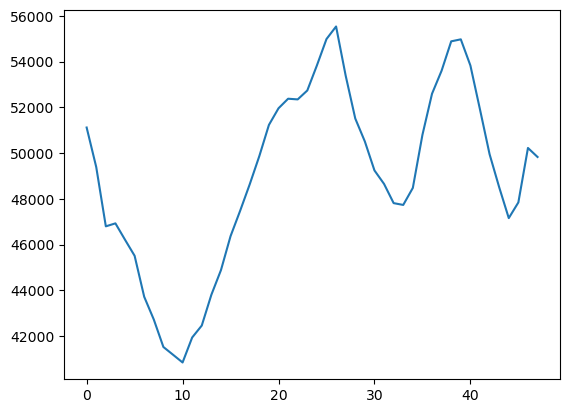

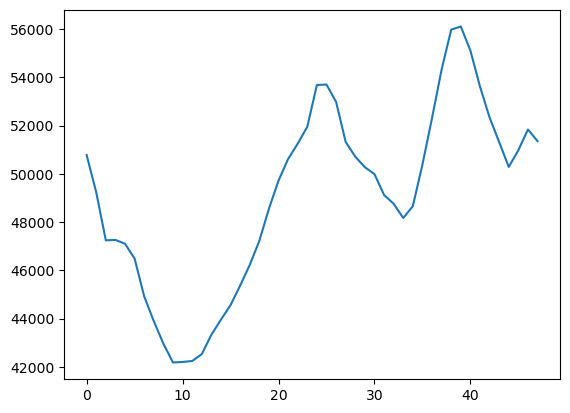

In [1]:
import numpy as np 
import csv 
import pandas as pd
import xlrd
from matplotlib import pyplot as plt

#import jour de référence
df = pd.read_csv("7janvier.csv")
df=df.dropna()
jourCherche = df.Consommation
#print("Contents :", jourCherche)

#import RTE
df = pd.read_csv('RTE.csv')
df=df.dropna()
data2020 = df.Consommation
#print("Contents :", data2020)

#import jour valeur réelle
df = pd.read_csv("8janvier.csv")
df=df.dropna()
jourReel = df.Consommation

#formatage de l'objet RTE panda en tableau compréhensible
array_jour_ref = []
for i in data2020:
    array_jour_ref.append(i)

#print(len(array_jour))

array_jour_cherche = []
#formatage du jour du 7 janvier pour avoir un tableau identique
for i in jourCherche:
    array_jour_cherche.append(i)


#etape 1 : separation des jours du RTE
#il y a 366 jours en 2020 donc on divise par 366 
array_splited = np.array_split(array_jour_ref, 366)
print(len(array_jour_cherche))

print(len(array_splited[0]))

#etape 2 : corrélation entre chaque jour 
def create_correlation_matrix(x, y):
    cor = np.corrcoef(x, y)[0, 1]
    return cor
    
correl_array = []  
x = np.array(array_jour_cherche)


for i in range (len(array_splited)):
    y = np.array(array_splited[i])
    cor = [
        i,
        create_correlation_matrix(x, y)
    ]
    correl_array.append(cor)  
    

#etape 3 : tri du tableau pour récupérer le meilleur jour
correl_array.sort(reverse = True,key = lambda i:i[1])

#extraction du meilleur jour qui se trouve donc en position 1, puis on lui ajoute 1 car les tableaux python commencent à 0
meilleur_jour = correl_array[0]

print(meilleur_jour[0]+1)

#prédiction
poly = np.polyfit(array_splited[meilleur_jour[0]], array_splited[meilleur_jour[0]+1], 1)
prediction = np.polyval(poly, array_splited[meilleur_jour[0]])

#on affiche le graphique pour comparaison
def plot_array(y):
    x = range(len(y))
    plt.plot(x, y)
    plt.show()
    
#sous-estimation des valeurs 
array_jour_prediction = []
for i in range(len(prediction)):
    array_jour_prediction.append(prediction[i]-13500)
    
#plot_array(array_jour_prediction)
#on affiche les véritables valeurs
array_jour_reel = []
#formatage du jour du 8 janvier pour avoir un tableau identique
#ajout d'une surestimation aux données de 2020
for i in jourReel:
    array_jour_reel.append(i)

plot_array(array_jour_prediction)
plot_array(array_jour_reel)

